In [22]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
!pip install --upgrade pandas_datareader
import matplotlib
import matplotlib.pyplot as plt

p = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/02/2017", end="01/02/2021",interval="m")
p = p['Adj Close']
Dif = np.log(p) - np.log(p.shift(1))
Dif=Dif.dropna()
Dif.columns=['ALFAA','MXX']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


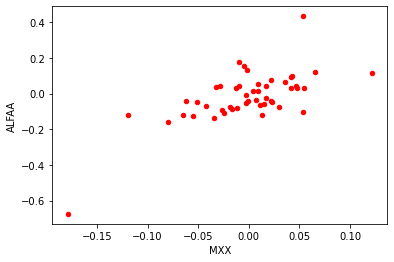

In [13]:
sr.plot.scatter(x='MXX', y='ALFAA',c='red')
plt.show()

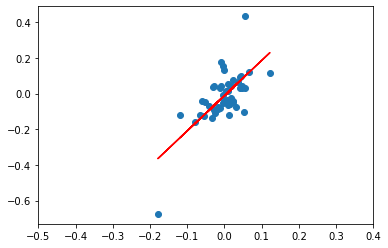

In [23]:
plt.clf()
x=Dif['MXX']
y = Dif['ALFAA']
plt.scatter(x, y)
b1,b0 = np.polyfit(x,y,1)
fit = b0+b1*x
plt.plot(x, fit,c="red")
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


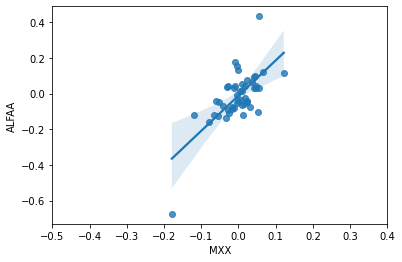

In [15]:
import seaborn as sns
plt.clf()

sns.regplot(x, y)
plt.xticks(np.arange(-0.50,0.5,0.1))

plt.show()

In [16]:
import statsmodels.api as sm
X = sm.add_constant(x)

Model1 = sm.OLS(y,X).fit()

print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     40.83
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           7.52e-08
Time:                        02:53:17   Log-Likelihood:                 40.998
No. Observations:                  48   AIC:                            -78.00
Df Residuals:                      46   BIC:                            -74.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0116      0.015     -0.765      0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
import statsmodels.formula.api as smf

Model2 = smf.ols('ALFAA ~ MXX',data=sr).fit()

print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     40.83
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           7.52e-08
Time:                        02:53:20   Log-Likelihood:                 40.998
No. Observations:                  48   AIC:                            -78.00
Df Residuals:                      46   BIC:                            -74.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0116      0.015     -0.765      0.4

INTEPRETATION:
WE CAN INTERPRET THE **P** VALUE OF 0.448 AS A PROBABILITY OF 44% THAT WE ARE WRONG :/ SO WE CAN NOT DROP THE NULE HYPOTHESIS.
 REGRESSION EQUATION:
E[ALFAret]= -0.01162065 + 1.97408816*MXXret.
